#### Import Libraries

In [ ]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
 
import datetime as dt
import re 
import string 
from nltk.tokenize import word_tokenize 
from nltk.corpus import stopwords 
 
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory 
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory  
 
from wordcloud import WordCloud 
 
import nltk  
nltk.download('punkt')  
nltk.download('stopwords')  

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\muhst\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\muhst\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

#### Data

In [16]:
df = pd.read_csv('livin_reviews.csv')
df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,2e5fbd4a-43c2-4ff1-b1b5-1633f52dcc5f,Tara Alamsyah,https://play-lh.googleusercontent.com/a-/ALV-U...,Masih banyak kurangnya dari aplikasi m-banking...,1,39,2.2.0,2025-04-23 22:30:08,"Halo Sahabat @Tara Alamsyah, mohon maaf atas k...",2025-04-23 22:33:52,2.2.0
1,3def0af8-9d15-4dd7-8a53-826704f9657a,Sebastiano ruazoba,https://play-lh.googleusercontent.com/a-/ALV-U...,"penanganan masalah lambat, tidak ada perkemban...",1,37,2.2.0,2025-04-12 12:18:36,"Halo Sahabat @Sebastiano ruazoba, mohon maaf a...",2025-04-12 12:35:11,2.2.0
2,7eca96d4-4e12-4b71-b121-4ae265da9dff,Abil Waqfi,https://play-lh.googleusercontent.com/a/ACg8oc...,kenapa sekarang Livin sering eror....udah pern...,2,14,2.2.0,2025-04-25 21:40:15,"Hi Sahabat @Abil Waqfi, mohon maaf atas ketida...",2025-04-25 21:42:34,2.2.0
3,130e264a-55f8-49d3-86fc-9f8943d36fb6,Sangaji Yoga Putra,https://play-lh.googleusercontent.com/a-/ALV-U...,user interfacenya bikin pusing. mau pembayaran...,1,2,2.2.0,2025-04-30 15:11:48,"Halo Sahabat @Sangaji Yoga Putra, mohon maaf a...",2025-04-30 15:35:29,2.2.0
4,a6325579-20b3-45d9-83c7-731573a8233f,Eka Septi Suhartini,https://play-lh.googleusercontent.com/a-/ALV-U...,Livin mandiri lagi kenapa ini ya???? Mau buka ...,1,1364,2.2.0,2025-03-13 18:40:06,"Halo Sahabat @Eka Septi Suhartini, mohon maaf ...",2025-03-13 18:59:59,2.2.0


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   reviewId              10000 non-null  object
 1   userName              10000 non-null  object
 2   userImage             10000 non-null  object
 3   content               10000 non-null  object
 4   score                 10000 non-null  int64 
 5   thumbsUpCount         10000 non-null  int64 
 6   reviewCreatedVersion  9075 non-null   object
 7   at                    10000 non-null  object
 8   replyContent          9422 non-null   object
 9   repliedAt             9422 non-null   object
 10  appVersion            9075 non-null   object
dtypes: int64(2), object(9)
memory usage: 859.5+ KB


In [18]:
df = df.dropna()
df = df.drop_duplicates()
jumlah_ulasan_setelah_hapus_duplikat, jumlah_kolom_setelah_hapus_duplikat = df.shape

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8525 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   reviewId              8525 non-null   object
 1   userName              8525 non-null   object
 2   userImage             8525 non-null   object
 3   content               8525 non-null   object
 4   score                 8525 non-null   int64 
 5   thumbsUpCount         8525 non-null   int64 
 6   reviewCreatedVersion  8525 non-null   object
 7   at                    8525 non-null   object
 8   replyContent          8525 non-null   object
 9   repliedAt             8525 non-null   object
 10  appVersion            8525 non-null   object
dtypes: int64(2), object(9)
memory usage: 799.2+ KB


#### Data Preprocessing

In [ ]:
def cleaningText(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) # menghapus mention
    text = re.sub(r'#[A-Za-z0-9]+', '', text) # menghapus hashtag
    text = re.sub(r'RT[\s]', '', text) # menghapus RT
    text = re.sub(r"http\S+", '', text) # menghapus link
    text = re.sub(r'[0-9]+', '', text) # menghapus angka
    text = re.sub(r'[^\w\s]', '', text) # menghapus karakter selain huruf dan angka
 
    text = text.replace('\n', ' ') # mengganti baris baru dengan spasi
    text = text.translate(str.maketrans('', '', string.punctuation)) # menghapus semua tanda baca
    text = text.strip(' ') # menghapus karakter spasi dari kiri dan kanan teks
    return text
 
def casefoldingText(text): # Mengubah semua karakter dalam teks menjadi huruf kecil
    text = text.lower()
    return text
 
def tokenizingText(text): # Memecah atau membagi string, teks menjadi daftar token
    text = word_tokenize(text)
    return text
 
def filteringText(text): # Menghapus stopwords dalam teks
    listStopwords = set(stopwords.words('indonesian'))
    listStopwords1 = set(stopwords.words('english'))
    listStopwords.update(listStopwords1)
    listStopwords.update(['iya','yaa','gak','nya','na','sih','ku',"di","ga","ya","gaa","loh","kah","woi","woii","woy"])
    filtered = []
    for txt in text:
        if txt not in listStopwords:
            filtered.append(txt)
    text = filtered
    return text
 
def stemmingText(text): # Mengurangi kata ke bentuk dasarnya yang menghilangkan imbuhan awalan dan akhiran atau ke akar kata
    # Membuat objek stemmer
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
 
    # Memecah teks menjadi daftar kata
    words = text.split()
 
    # Menerapkan stemming pada setiap kata dalam daftar
    stemmed_words = [stemmer.stem(word) for word in words]
 
    # Menggabungkan kata-kata yang telah distem
    stemmed_text = ' '.join(stemmed_words)
 
    return stemmed_text
 
def toSentence(list_words): # Mengubah daftar kata menjadi kalimat
    sentence = ' '.join(word for word in list_words)
    return sentence

slangwords = {
    "@": "di",
    "abis": "habis",
    "wtb": "beli",
    "masi": "masih",
    "wts": "jual",
    "wtt": "tukar",
    "bgt": "banget",
    "maks": "maksimal",
    "tp": "tapi",
    "krn": "karena",
    "dr": "dari",
    "jg": "juga",
    "udh": "sudah",
    "sdh": "sudah",
    "blm": "belum",
    "dgn": "dengan",
    "ga": "tidak",
    "gak": "tidak",
    "nggak": "tidak",
    "aja": "saja",
    "klo": "kalau",
    "kl": "kalau",
    "dl": "dulu",
    "sm": "sama",
    "cm": "cuma",
    "bbrp": "beberapa",
    "lg": "lagi",
    "bgt": "banget",
    "trs": "terus",
    "sy": "saya",
    "gw": "saya",
    "loe": "kamu",
    "lu": "kamu",
    "lo": "kamu"
}

def fix_slangwords(text):
    words = text.split()
    fixed_words = []
 
    for word in words:
        if word.lower() in slangwords:
            fixed_words.append(slangwords[word.lower()])
        else:
            fixed_words.append(word)
 
    fixed_text = ' '.join(fixed_words)
    return fixed_text

In [23]:
# Membersihkan teks dan menyimpannya di kolom 'text_clean'
df['text_clean'] = df['content'].apply(cleaningText)
 
# Mengubah huruf dalam teks menjadi huruf kecil dan menyimpannya di 'text_casefoldingText'
df['text_casefoldingText'] = df['text_clean'].apply(casefoldingText)
 
# Mengganti kata-kata slang dengan kata-kata standar dan menyimpannya di 'text_slangwords'
df['text_slangwords'] = df['text_casefoldingText'].apply(fix_slangwords)
 
# Memecah teks menjadi token (kata-kata) dan menyimpannya di 'text_tokenizingText'
df['text_tokenizingText'] = df['text_slangwords'].apply(tokenizingText)
 
# Menghapus kata-kata stop (kata-kata umum) dan menyimpannya di 'text_stopword'
df['text_stopword'] = df['text_tokenizingText'].apply(filteringText)
 
# Menggabungkan token-token menjadi kalimat dan menyimpannya di 'text_akhir'
df['text_akhir'] = df['text_stopword'].apply(toSentence)

In [24]:
df.to_csv("data_preprocessed.csv")

#### Data Labelling

In [25]:
import csv
import requests
from io import StringIO
 
# Membaca data kamus kata-kata positif dari GitHub
lexicon_positive = dict()
 
response = requests.get('https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_positive.csv')
# Mengirim permintaan HTTP untuk mendapatkan file CSV dari GitHub
 
if response.status_code == 200:
    # Jika permintaan berhasil
    reader = csv.reader(StringIO(response.text), delimiter=',')
    # Membaca teks respons sebagai file CSV menggunakan pembaca CSV dengan pemisah koma
 
    for row in reader:
        # Mengulangi setiap baris dalam file CSV
        lexicon_positive[row[0]] = int(row[1])
        # Menambahkan kata-kata positif dan skornya ke dalam kamus lexicon_positive
else:
    print("Failed to fetch positive lexicon data")
 
# Membaca data kamus kata-kata negatif dari GitHub
lexicon_negative = dict()
 
response = requests.get('https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_negative.csv')
# Mengirim permintaan HTTP untuk mendapatkan file CSV dari GitHub
 
if response.status_code == 200:
    # Jika permintaan berhasil
    reader = csv.reader(StringIO(response.text), delimiter=',')
    # Membaca teks respons sebagai file CSV menggunakan pembaca CSV dengan pemisah koma
 
    for row in reader:
        # Mengulangi setiap baris dalam file CSV
        lexicon_negative[row[0]] = int(row[1])
        # Menambahkan kata-kata negatif dan skornya dalam kamus lexicon_negative
else:
    print("Failed to fetch negative lexicon data")

In [26]:
def sentiment_analysis_lexicon_indonesia(text):
    #for word in text:
 
    score = 0
    # Inisialisasi skor sentimen ke 0
 
    for word in text:
        # Mengulangi setiap kata dalam teks
 
        if (word in lexicon_positive):
            score = score + lexicon_positive[word]
            # Jika kata ada dalam kamus positif, tambahkan skornya ke skor sentimen
 
    for word in text:
        # Mengulangi setiap kata dalam teks (sekali lagi)
 
        if (word in lexicon_negative):
            score = score + lexicon_negative[word]
            # Jika kata ada dalam kamus negatif, kurangkan skornya dari skor sentimen
 
    polarity=''
    # Inisialisasi variabel polaritas
 
    if (score > 0):
        polarity = 'positive'
        # Jika skor sentimen lebih besar atau sama dengan 0, maka polaritas adalah positif
    elif (score < 0):
        polarity = 'negative'
        # Jika skor sentimen kurang dari 0, maka polaritas adalah negatif
 
    else:
        polarity = 'neutral'
    # Ini adalah bagian yang bisa digunakan untuk menentukan polaritas netral jika diperlukan
 
    return score, polarity
    # Mengembalikan skor sentimen dan polaritas teks

In [27]:
results = df['text_stopword'].apply(sentiment_analysis_lexicon_indonesia)
results = list(zip(*results))
df['polarity_score'] = results[0]
df['polarity'] = results[1]
print(df['polarity'].value_counts())

polarity
negative    5353
positive    2614
neutral      558
Name: count, dtype: int64


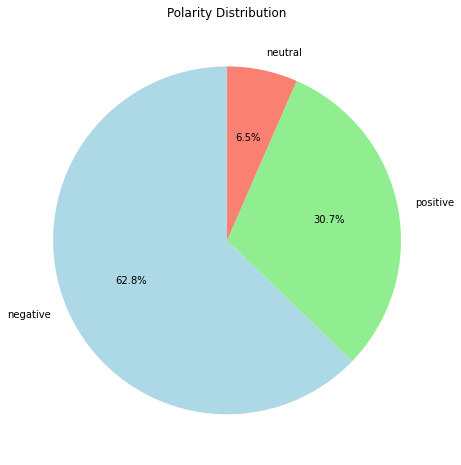

In [28]:
# Count the occurrences of each polarity
polarity_counts = df['polarity'].value_counts()

# Plot the pie chart
plt.figure(figsize=(8, 8))
polarity_counts.plot.pie(autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightgreen', 'salmon'])
plt.title('Polarity Distribution')
plt.ylabel('')  # Remove y-axis label for better visualization
plt.show()